In [1]:
import pandas as pd
df= pd.read_excel(r"C:\Users\polpi\Desktop\data science\assignments\Association Rules\Online retail.xlsx")
df

,PRODUCTS
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [2]:
df.columns

Index(['PRODUCTS'], dtype='object')

In [3]:
df.isnull().sum()

PRODUCTS    0
dtype: int64

In [4]:
df.shape

(7501, 1)

In [5]:
!pip install mlxtend

In [7]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

print("Assuming 'PRODUCTS' column is a string of comma-separated values, we need to split the products and create a list of transactions")
transactions = df['PRODUCTS'].str.split(',').tolist()

te = TransactionEncoder()

te_ary = te.fit(transactions).transform(transactions)

dataset = pd.DataFrame(te_ary, columns=te.columns_)

print(dataset.head())


Assuming 'PRODUCTS' column is a string of comma-separated values, we need to split the products and create a list of transactions
    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False     True               True      False     True        False   
1       False    False              False      False    False        False   
2       False    False              False      False    False        False   
3       False    False              False      False     True        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False            True   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...   False           False   
3  False           False      False        False  ...    True           False

In [8]:
frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print(rules)


                    antecedents                 consequents  \
0               (mineral water)                   (avocado)   
1                     (avocado)             (mineral water)   
2                     (burgers)                      (cake)   
3                        (cake)                   (burgers)   
4                   (chocolate)                   (burgers)   
..                          ...                         ...   
401       (pancakes, spaghetti)             (mineral water)   
402  (mineral water, spaghetti)                  (pancakes)   
403                  (pancakes)  (mineral water, spaghetti)   
404             (mineral water)       (pancakes, spaghetti)   
405                 (spaghetti)   (pancakes, mineral water)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.238368            0.033329  0.011598    0.048658  1.459926   
1              0.033329            0.238368  0.011598    0.348000  1.459926   
2     

Support: Indicates how frequently a product or itemset appears in the dataset. Higher support means the itemset is more common among transactions.
Confidence: Measures the likelihood that a product A is purchased when product B is purchased. It is the ratio of transactions that contain both items to those that contain the antecedent.
Lift: Compares the observed frequency of itemsets to the expected frequency if the items were independent. A lift greater than 1 indicates a positive association.


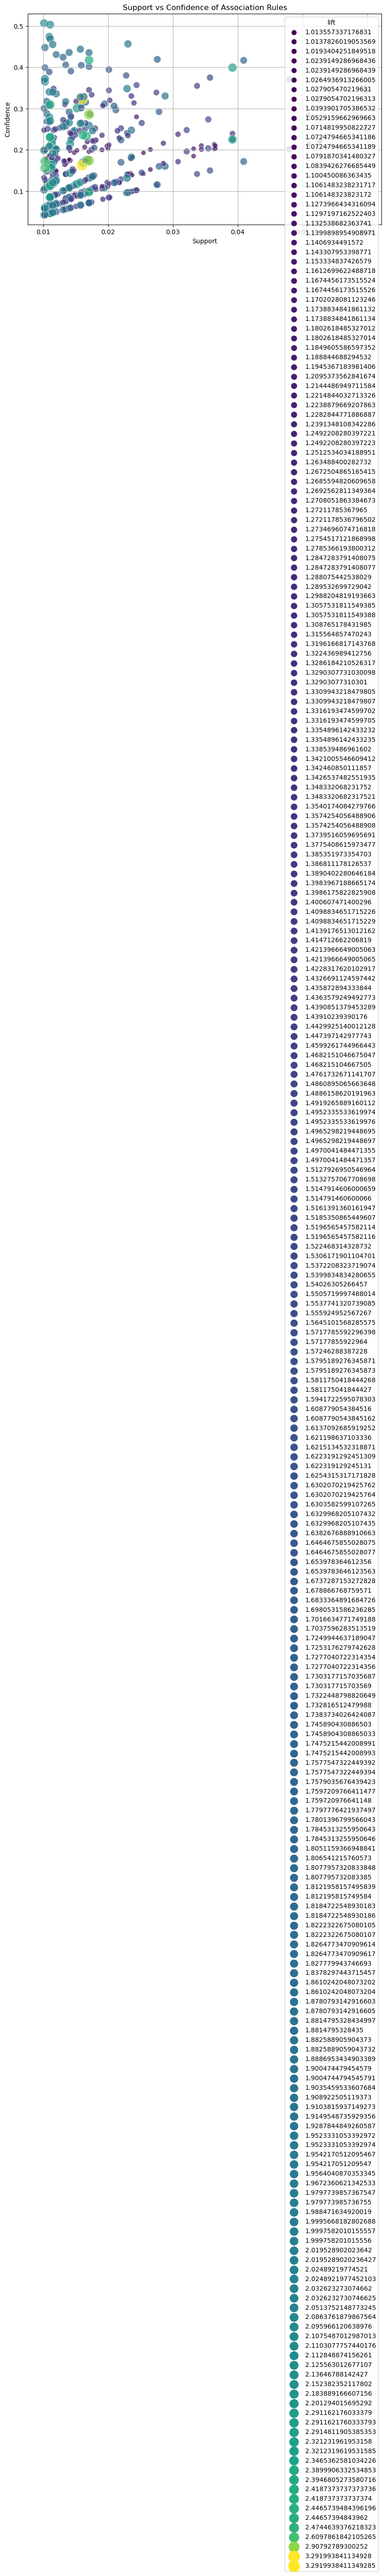

In [9]:
print("Support: Indicates how frequently a product or itemset appears in the dataset. Higher support means the itemset is more common among transactions.")
print("Confidence: Measures the likelihood that a product A is purchased when product B is purchased. It is the ratio of transactions that contain both items to those that contain the antecedent.")
print("Lift: Compares the observed frequency of itemsets to the expected frequency if the items were independent. A lift greater than 1 indicates a positive association.")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(50, 300), hue='lift', palette='viridis', legend='full', alpha=0.7)
plt.title('Support vs Confidence of Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid()
plt.show()


In [11]:
print(rules.columns)

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction', 'zhangs_metric'],
      dtype='object')


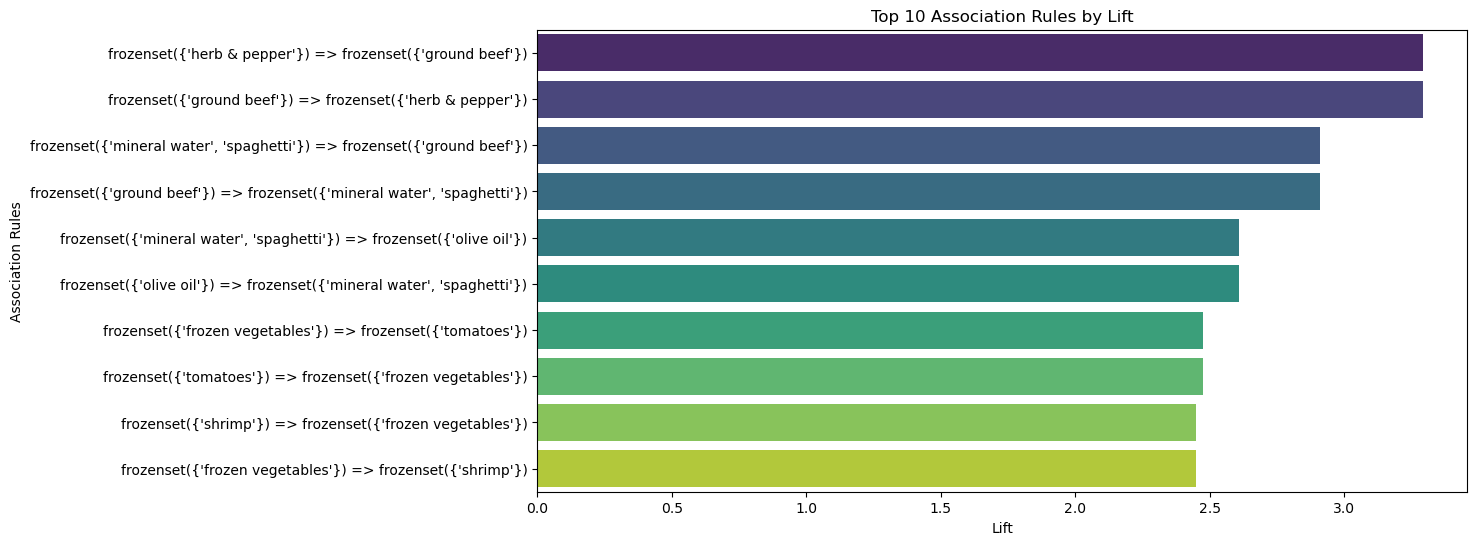

In [12]:
# creates a new column that combines the antecedents and consequents into a single string for easier readability
rules['rule'] = rules['antecedents'].astype(str) + ' => ' + rules['consequents'].astype(str)

# The top 10 rules based on lift
top_rules = rules.nlargest(10, 'lift')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_rules, x='lift', y='rule', palette='viridis')
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Association Rules')
plt.show()


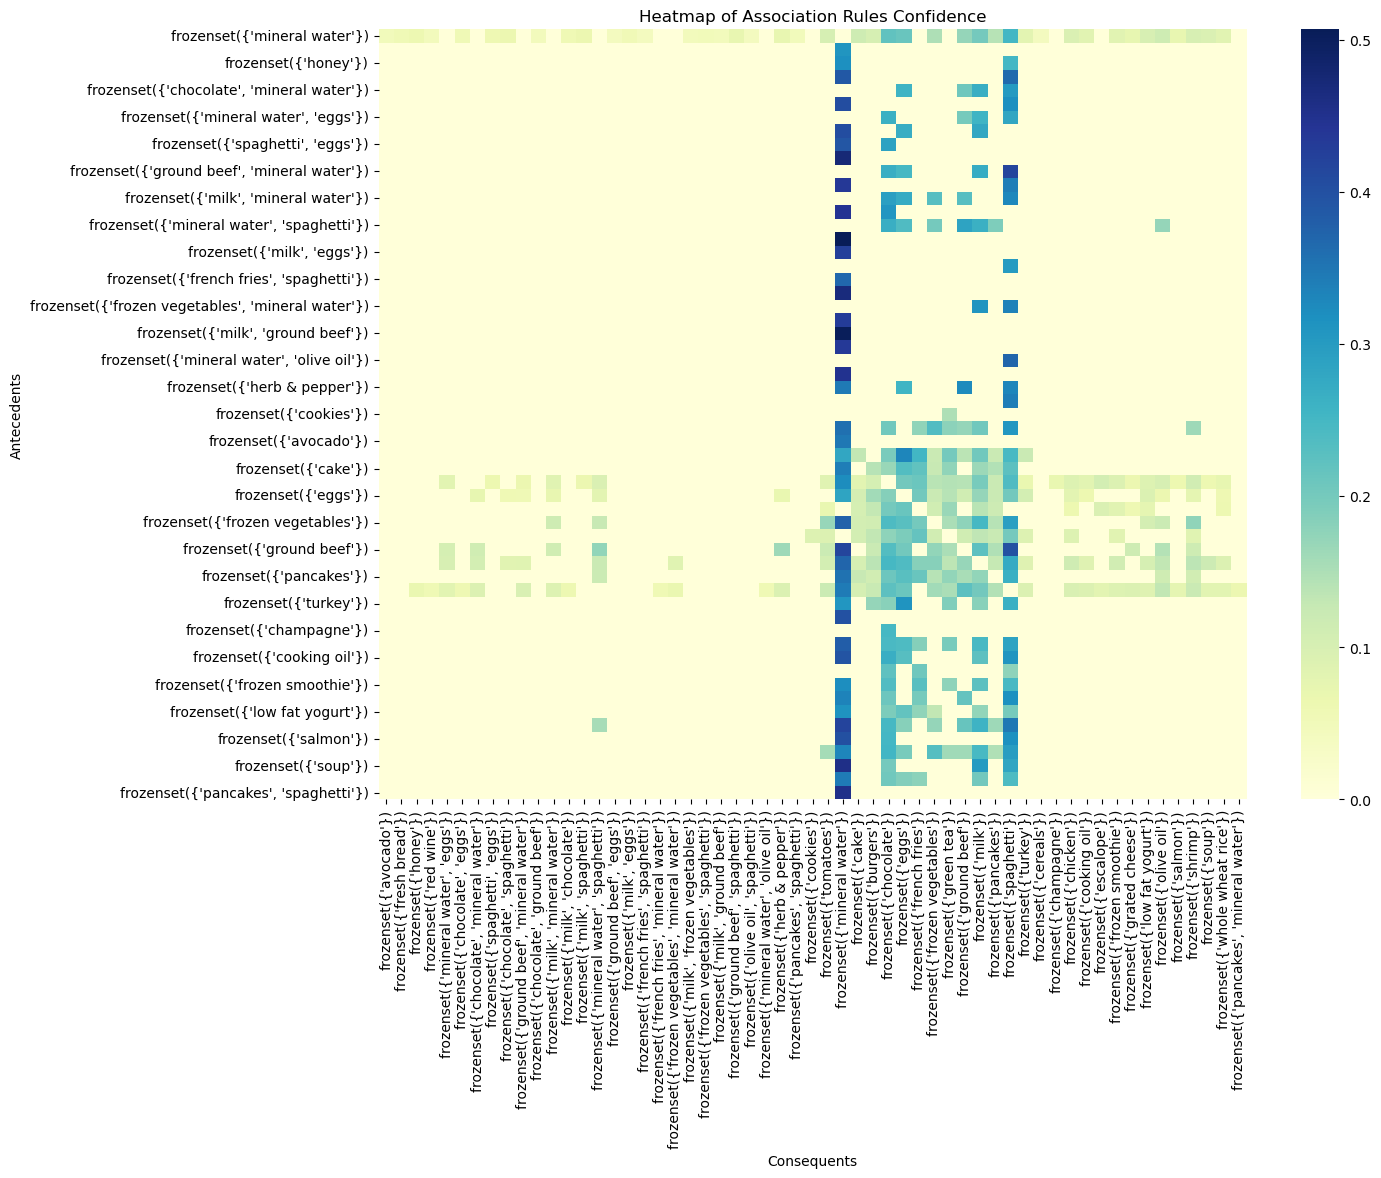

In [14]:
# Create a matrix for the heatmap
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='confidence').fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=False, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap of Association Rules Confidence')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()


In [15]:
# Highest Lift
highest_lift = rules.loc[rules['lift'].idxmax()]
print("Highest Lift:")
print(highest_lift)

# Highest Support
highest_support = rules.loc[rules['support'].idxmax()]
print("\nHighest Support:")
print(highest_support)

# Highest Confidence
highest_confidence = rules.loc[rules['confidence'].idxmax()]
print("\nHighest Confidence:")
print(highest_confidence)


Highest Lift:
antecedents                                             (herb & pepper)
consequents                                               (ground beef)
antecedent support                                              0.04946
consequent support                                             0.098254
support                                                        0.015998
confidence                                                      0.32345
lift                                                           3.291994
leverage                                                       0.011138
conviction                                                      1.33286
zhangs_metric                                                   0.73246
rule                  frozenset({'herb & pepper'}) => frozenset({'gr...
Name: 215, dtype: object

Highest Support:
antecedents                                             (mineral water)
consequents                                                 (spaghetti)
anteced

In [ ]:
print("These results tell us that herb & pepper are mostly bought alongside of ground beef")
print("Whenever one buys ground beef and eggs, normally they would buy mineral water as well")
print("Mineral water is bought most in the store. And mostly bought alongside of spaghetti")
print("Since mineral water is a regular buy, we should remove mineral water column and check for better associations")

In [16]:
df = df[~df['PRODUCTS'].str.contains('mineral water', na=False)]

transactions = df['PRODUCTS'].str.split(',')

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
dataset = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print(rules)

highest_lift = rules.loc[rules['lift'].idxmax()]
highest_support = rules.loc[rules['support'].idxmax()]
highest_confidence = rules.loc[rules['confidence'].idxmax()]

print("\nHighest Lift:")
print(highest_lift)

print("\nHighest Support:")
print(highest_support)

print("\nHighest Confidence:")
print(highest_confidence)

            antecedents         consequents  antecedent support  \
0           (chocolate)           (burgers)            0.145983   
1             (burgers)         (chocolate)            0.082444   
2             (burgers)              (eggs)            0.082444   
3                (eggs)           (burgers)            0.169088   
4        (french fries)           (burgers)            0.180116   
..                  ...                 ...                 ...   
173         (spaghetti)          (tomatoes)            0.150184   
174         (spaghetti)            (turkey)            0.150184   
175            (turkey)         (spaghetti)            0.056888   
176  (whole wheat rice)         (spaghetti)            0.050411   
177         (spaghetti)  (whole wheat rice)            0.150184   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.082444  0.014878    0.101918  1.236221  0.002843    1.021685   
1              0.145983  0.014878

In [18]:
print("Upon removing mineral water from the list, we see that french fries are the most bought, and mostly alongside of eggs")
print("Whenever one buys ground beef, they would also buy spaghetti")

Upon removing mineral water from the list, we see that french fries are the most bought, and mostly alongside of eggs
Whenever one buys ground beef, they would also buy spaghetti


In [2]:
print("Lift gives the ratio of two items occurring together vs items occurring independently.")
print("Lift gives us an understanding that if how presence of one item affects the presence of another item.")
print("")
print("Support is the frequency of a particular item in the entire dataset while \nconfidence is the likelihood of item B's presence when item A has occurred")
print("Support: No. of transactions where A item appears/Total no. of transactions")
print("Confidence is No. of transactions where both A and B item appear/No. of transactions where A item appears")
print("")
print("Here are few limitations of Association rules mining:\nItems with low frequency might be ignored due to high support threshold")
print("Association rules do not take into account temporal data of items bought")


Lift gives the ratio of two items occurring together vs items occurring independently.
Lift gives us an understanding that if how presence of one item affects the presence of another item.

Support is the frequency of a particular item in the entire dataset while 
confidence is the likelihood of item B's presence when item A has occurred
Support: No. of transactions where A item appears/Total no. of transactions
Confidence is No. of transactions where both A and B item appear/No. of transactions where A item appears

Here are few limitations of Association rules mining:
Items with low frequency might be ignored due to high support threshold
Association rules do not take into account temporal data of items bought
